In [69]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [70]:
#1. 데이터 구성하기(1)
df_raw = pd.read_csv("../data/Big Data 분석/유방암.csv", encoding='euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [71]:
#1. 데이터 구성하기(2) - 결측치 확인
df_raw.isnull().sum(axis=0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [72]:
#1. 데이터 구성하기(3)
df_raw['diagnosis'].replace({'음성':0, '양성': 1}, inplace=True)

df_raw_x = df_raw.drop("diagnosis",axis=1)
df_raw_y = df_raw["diagnosis"]

df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [73]:
#1. 데이터 구성하기(4) - 데이터 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4, random_state=1234)

print("train data size: {}".format(df_train_x.shape))
print("test data size: {}".format(df_test_x.shape))

train data size: (192, 30)
test data size: (128, 30)


In [74]:
#2. Over-Sampling: SMOTE(1) - 목표변수 빈도 확인

print(df_raw.value_counts(["diagnosis"], "\n"))
print("diagnosis=1 비율 ", df_raw.value_counts(df_raw["diagnosis"]==1)/len(df_raw))

diagnosis
0            0.6625
1            0.3375
dtype: float64
diagnosis=1 비율  diagnosis
False    0.6625
True     0.3375
dtype: float64


In [75]:
#2. Over-Sampling: SMOTE(2)

sm = SMOTE(sampling_strategy='auto')

x_resampled, y_resampled = sm.fit_resample(df_train_x, df_train_y)

print("Over-sampling 전:\n", df_train_y.value_counts(),"\n")
print("Over-sampling 후 Train X:\n", x_resampled.shape)
print("Over-sampling 전 Train Y:\n", y_resampled.shape,"\n")
print("Over-sampling 후 '1':\n", sum((y_resampled==1)))
print("Over-sampling 후 '0':\n", sum((y_resampled==0)),"\n")

Over-sampling 전:
 0    115
1     77
Name: diagnosis, dtype: int64 

Over-sampling 후 Train X:
 (230, 30)
Over-sampling 전 Train Y:
 (230,) 

Over-sampling 후 '1':
 115
Over-sampling 후 '0':
 115 



In [76]:
#2. Over-Sampling: SMOTE(3) - 데이터 결합

df_resampled = pd.concat([x_resampled, y_resampled], axis=1)
print(df_resampled.head())

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0       13.150         15.34           85.31      538.9          0.09384   
1       15.750         19.22          107.10      758.6          0.12430   
2       20.640         17.35          134.80     1335.0          0.09446   
3       15.710         13.93          102.00      761.7          0.09462   
4        9.667         18.49           61.49      289.1          0.08946   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0           0.08498         0.09293              0.03483         0.1822   
1           0.23640         0.29140              0.12420         0.2375   
2           0.10760         0.15270              0.08941         0.1571   
3           0.09462         0.07135              0.05933         0.1816   
4           0.06258         0.02948              0.01514         0.2238   

   mean_fractal_dimension  ...  worst_texture  worst_perimeter  worst_area  \
0             

In [77]:
#3. 데이터 scale 변환(1)

#변수명 저장
v_feature_name = df_train_x.columns

#StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [78]:
#3. 데이터 scale 변환(2) - 데이터 분할

df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.4, random_state= 1234)
print("train data X size: {}".format(df_scaled_train_x.shape))
print("test data X size: {}".format(df_scaled_test_x.shape))

train data X size: (192, 30)
test data X size: (128, 30)


# 과제 1. 서포트 벡터 머신_분류

In [79]:
#1. 모델 생성(1) - 기본: 원본 데이터 사용

svm_uncustomized = SVC(random_state = 1234)
svm_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on training set: {:.3f}'.format(svm_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set: {:.3f}'.format(svm_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.885
Accuracy on test set: 0.891


In [80]:
#1. 모델 생성(1) - 기본: over-sampling된 데이터 사용

svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(x_resampled, y_resampled)

print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(x_resampled, y_resampled)))
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.900
Accuracy on test set: 0.867


In [81]:
#1. 모델 생성(1) - 기본: scaled 데이터 사용

svm_scaled = SVC(random_state= 1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)

print('Accuracy on training set: {:.3f}'.format(svm_scaled.score(df_scaled_train_x, df_train_y)))
print('Accuracy on test set: {:.3f}'.format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.995
Accuracy on test set: 0.961


## 기본 옵션을기반으로 3가지 모델을 생성했다. 원본 데이터를 활용한 모델, over-sampling된 데이터를 활용한 모델, scaled 데이터를 활용한 모델이다.

## 세 개 모델의 train accuracy와 test accuracy를 확인해 보면, train data에 과대적합이 되어있지 않다는 것을 볼 수 있다. 특히, 원본 데이터를 활용한 모델은 train accuracy에 비해 test accuracy가 더 높은 것을 보아 general 모델에 가깝게 생성된 것을 볼 수 있었다.

## 결론적으로, scaled 데이터를 활용한 모델의 test accuracy가 높았기에 파라미터 조정에서 사용할 데이터들은 scaled 데이터이다.(df_scaled_train_x, df_train_y)

In [82]:
#1. 모델 생성(2) - C 조정
#Case1, para_c의 구간이 [10 **c for c in range(-2,2)]인 경우

train_accuracy = []
test_accuracy = []

para_c = [10 **c for c in range(-2,2)] #ex. 0.01, 0.1, 1 ,10

for v_C in para_c:
    svm = SVC(C=v_C, random_state=1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
#결과 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

#모델 설명력 확인
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.599,0.758
1,0.10,0.964,0.906
2,1.00,0.995,0.961
3,10.00,1.000,0.961


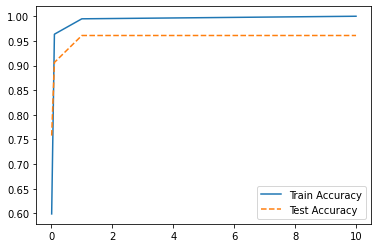

In [83]:
plt.plot(para_c, train_accuracy, linestyle='-', label="Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle='--', label="Test Accuracy")
plt.legend()

## para_c의 구간이 [10 **c for c in range(-2,2)]에서 C가 1 이상이면 test accuracy의 변화가 없다. 즉, train data에 과대적합되고 있기에 para_c의 구간을 [0.1 *c for c in range(1,10)]로 설정해서 다시 확인해본다.

In [84]:
#1. 모델 생성(2) - C 조정
#Case2, para_c의 구간이 [0.1 *c for c in range(1,10)]인 경우

train_accuracy = []
test_accuracy = []

para_c = [0.1 *c for c in range(1,10)] # C 변화 구간 변경

for v_C in para_c:
    svm = SVC(C=v_C, random_state=1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
#결과 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

#모델 설명력 확인
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.1,0.964,0.906
1,0.2,0.969,0.930
2,0.3,0.974,0.930
3,0.4,0.979,0.938
4,0.5,0.984,0.930
5,0.6,0.995,0.938
6,0.7,0.995,0.945
7,0.8,0.995,0.953
8,0.9,0.995,0.953


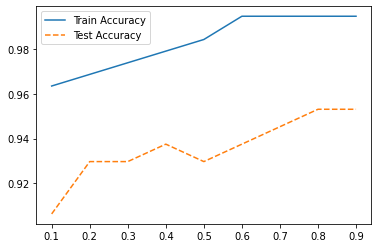

In [85]:
plt.plot(para_c, train_accuracy, linestyle='-', label="Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle='--', label="Test Accuracy")
plt.legend()

In [90]:
#1. 모델 생성(2) - C 지정
C = 0.7

## para_c가 0.5~0.8 구간에서 train과 test accuracy가 함께 증가하고 있다. 해당 과제에서는 C를 0.7로 지정해본다.

In [91]:
#1. 모델 생성(3) - Gamma 조정
#Case1, para_gamma의 구간이 [10 **c for c in range(-2,2)]인 경우

train_accuracy = []
test_accuracy = []

para_gamma = [10 **gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm = SVC(gamma=v_gamma, C=0.7, random_state=1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
#결과 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

#모델 설명력 확인
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.984,0.938
1,0.10,0.995,0.922
2,1.00,1.000,0.766
3,10.00,1.000,0.766


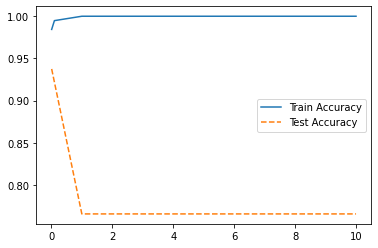

In [92]:
plt.plot(para_gamma, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_gamma, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.legend()

## gamma가 1 이상이면 train data에 과대적합한다.

In [93]:
#1. 모델 생성(3) - Gamma 조정
#Case2, para_gamma의 구간이 [0.1 *gamma for gamma in range(1,10)]인 경우

train_accuracy = []
test_accuracy = []

para_gamma = [0.1 *gamma for gamma in range(1,10)]

for v_gamma in para_gamma:
    svm = SVC(gamma=v_gamma, C=0.7, random_state=1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
#결과 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

#모델 설명력 확인
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.1,0.995,0.922
1,0.2,1.000,0.898
2,0.3,1.000,0.867
3,0.4,1.000,0.867
4,0.5,1.000,0.836
5,0.6,1.000,0.797
6,0.7,1.000,0.773
7,0.8,1.000,0.773
8,0.9,1.000,0.766


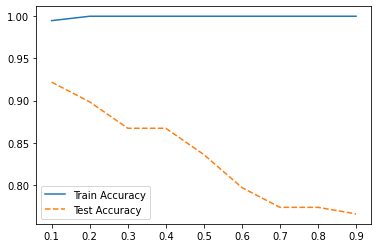

In [94]:
plt.plot(para_gamma, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_gamma, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.legend()

## gamma가 0.1 이상이면 test accuracy가 감소한다.

In [95]:
#1. 모델 생성(3) - Gamma 조정
#Case3, para_gamma의 구간이 [0.01 *gamma for gamma in range(1,10)]인 경우

train_accuracy = []
test_accuracy = []

para_gamma = [0.01 *gamma for gamma in range(1,10)]

for v_gamma in para_gamma:
    svm = SVC(gamma=v_gamma, C=0.7, random_state=1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
#결과 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

#모델 설명력 확인
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.984,0.938
1,0.02,0.995,0.945
2,0.03,0.995,0.945
3,0.04,0.995,0.938
4,0.05,0.995,0.930
5,0.06,0.995,0.922
6,0.07,0.995,0.922
7,0.08,0.995,0.922
8,0.09,0.995,0.922


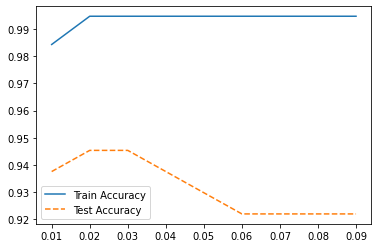

In [96]:
plt.plot(para_gamma, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_gamma, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.legend()

In [97]:
#1. 모델 생성(3) - Gamma 지정
gamma = 0.02

## 앞선 코드에서 gamma를 세 구간으로 나눠서 모델의 train과 test accuracy의 변화를 살펴봄으로써 해당 과제에서는 gamma를 0.02로 지정해본다.

In [98]:
#2. 최종 모델 선정

svc_final = SVC(gamma=0.02, C=0.7, random_state= 1234)
svc_final.fit(df_scaled_train_x, df_train_y)

SVC(C=0.7, gamma=0.02, random_state=1234)

In [99]:
#3. 최종 모델 평가
y_pred = svc_final.predict(df_scaled_test_x)
print("Accuracy on training set: {:.3f}".format(svc_final.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(svc_final.score(df_scaled_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 0.995
Accuracy on test set: 0.945
Confusion matrix: 
[[92  5]
 [ 2 29]]
              precision    recall  f1-score   support

           0      0.979     0.948     0.963        97
           1      0.853     0.935     0.892        31

    accuracy                          0.945       128
   macro avg      0.916     0.942     0.928       128
weighted avg      0.948     0.945     0.946       128



## 결론: SVM 모델의 accuracy는 약 94.5%이다. diagnosis가 음성인 경우, precision과 f1-score의 값의 큰 차이가 없으며 f1-score도 1에 가깝다고 볼 수 있다. 하지만 diagnosis가 양성인 경우 precision과 f1-score의 값이 차이를 보이고 있고 f1-score가 1에 가깝다고 보기는 어렵다. 따라서 유방암을 진단하는 데 있어 정확한 모델이라고 보기는 아쉬운 점이 있는 것 같다.